In [9]:
import math
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi
from scipy.spatial import Delaunay
import networkx as nx
import random
import copy
from collections import defaultdict, Counter
import itertools
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio.v2 as imageio
import os

from types import MappingProxyType

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [10]:
filepath = '0827/'
seedNumbers = [42, 43]
numProbes = [300, 1000, 3000, 10000]
numObstacles = 3000

0.529
0.52660854890421
0.313
0.5285995750369685
0.186
0.539444421728223
0.105
0.4318106638086677


Text(0.5, 1.0, 'nB = 3000')

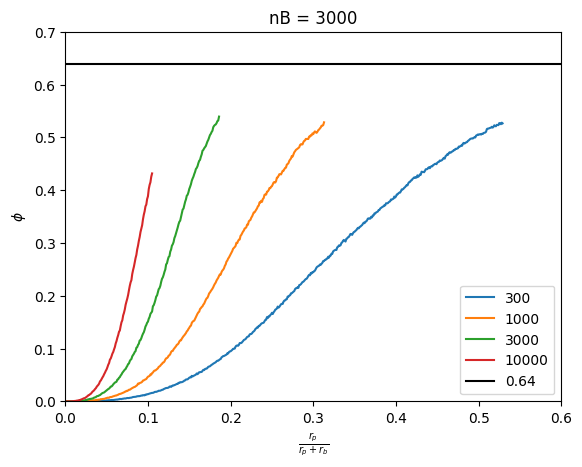

In [11]:
for numProbe in numProbes:
    xArray = []
    yArray = []
    for seedNumber in seedNumbers:
        filepathTmp = filepath + 'packingFraction/'
        tetraInfo = pd.read_csv(filepathTmp + str(numObstacles) + '_' + str(seedNumber) +  '_tetra.txt', sep=',')
        pf = pd.read_csv(filepathTmp + 'pf_' + str(numObstacles) + '_' + str(numProbe) + '_' + str(seedNumber) + '.txt', sep=' ')
        pf = pf.dropna(axis = 1)
        numConfigurations = len(pf)
        
        pf = pf.T
        pf.index = pf.index.astype(int)
        pf = pf.reset_index()
        pf = pf.rename(columns={'index': 'id'})
        pf = pf.sort_index()

        percolation = pf.copy()

        cols = [i for i in range(numConfigurations)]
        percolation[cols] = percolation[cols].mask(percolation[cols] < 1e-8, np.nan)

        weighted = percolation.copy()
        weighted = weighted.set_index('id')
        tetraInfo = tetraInfo.set_index('id')
        weighted[cols] *= tetraInfo.loc[weighted.index, "vol_fraction"].to_numpy()[:, None]

        yArray.append(weighted.sum())
        xArray.append(weighted.sum().index)
    
    y = pd.DataFrame(yArray)
    x = pd.DataFrame(xArray)
    y = y.dropna()
    
    y = y.mean()
    x = x.mean()

    print((x.iloc[-1]+1)/1000)

    plt.plot((x+1) / 1000, y, label=str(numProbe))
    print(y.iloc[-1])

plt.plot([0, 1.0], [0.64, 0.64], 'k', label='0.64')
plt.xlim(0, 0.6)
plt.ylim(0, 0.7)
plt.xlabel(r"$\frac{r_p}{r_p+r_b}$")
plt.ylabel(r"$\phi$")
plt.legend()
plt.title('nB = ' + str(numObstacles))

0.6309777478587895
0.5769309390261185
0.564909544882567
0.4523039838396549


Text(0.5, 1.0, 'nB = 3000')

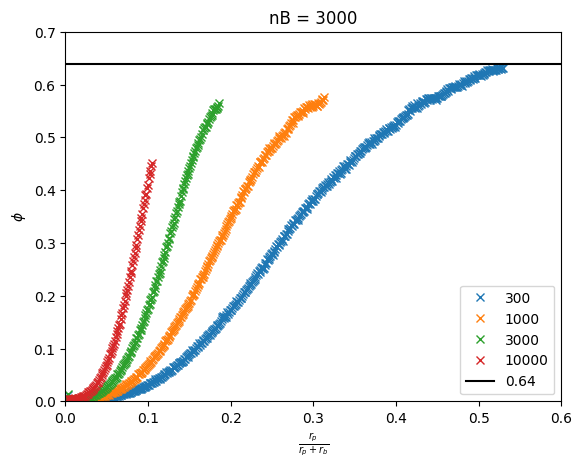

In [12]:
for numProbe in numProbes:
    xArray = []
    yArray = []
    for seedNumber in seedNumbers:
        filepathTmp = filepath + 'packingFraction/'
        tetraInfo = pd.read_csv(filepathTmp + str(numObstacles) + '_' + str(seedNumber) +  '_tetra.txt', sep=',')
        pf = pd.read_csv(filepathTmp + 'pf_' + str(numObstacles) + '_' + str(numProbe) + '_' + str(seedNumber) + '.txt', sep=' ')
        pf = pf.dropna(axis = 1)
        numConfigurations = len(pf)
        
        pf = pf.T
        pf.index = pf.index.astype(int)
        pf = pf.reset_index()
        pf = pf.rename(columns={'index': 'id'})
        pf = pf.sort_index()

        percolation = pf.copy()

        cols = [i for i in range(numConfigurations)]
        percolation[cols] = percolation[cols].mask(percolation[cols] < 1e-8, np.nan)

        percolation = percolation.set_index('id')
        tetraInfo = tetraInfo.set_index('id')

        pf = []
        for i in range(numConfigurations):
            pfi = 0
            sumVol = 0
            for ind, row in percolation.iterrows():
                vol = tetraInfo.loc[ind, 'vol_fraction']
                pfTmp = row[i]
                if pfTmp > 1e-8:
                    sumVol += vol
                    pfi += pfTmp * vol
            
            pf.append(pfi / sumVol if sumVol > 1e-8 else 0)

        yArray.append(pf)
        xArray.append(percolation.sum().index)
    
    y = pd.DataFrame(yArray)
    x = pd.DataFrame(xArray)

    y = y.dropna()
    y = y.mean()
    x = x.mean()

    plt.plot((x+1) / 1000, y, 'x', label=str(numProbe))
    print(y.iloc[-1])
    
plt.plot([0, 1.0], [0.64, 0.64], 'k', label='0.64')
plt.xlim(0, 0.6)
plt.ylim(0, 0.7)
plt.xlabel(r"$\frac{r_p}{r_p+r_b}$")
plt.ylabel(r"$\phi$")
plt.legend()
plt.title('nB = ' + str(numObstacles))